In [16]:
import geopandas as gpd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import shapely.wkt
import shapely.geometry
import pandas as pd
import shapely.geometry.multipolygon as sh

In [17]:
test = xr.open_dataset('test_2016.nc')
print(test)

<xarray.Dataset> Size: 251MB
Dimensions:               (x: 33, y: 59, time: 2928)
Coordinates:
  * x                     (x) float64 264B 97.5 97.75 98.0 ... 105.0 105.2 105.5
  * y                     (y) float64 472B 5.75 6.0 6.25 ... 19.75 20.0 20.25
  * time                  (time) datetime64[ns] 23kB 2015-12-31 ... 2016-04-3...
    lon                   (x) float64 264B ...
    lat                   (y) float64 472B ...
Data variables:
    height                (y, x) float32 8kB ...
    influx_toa            (time, y, x) float32 23MB ...
    influx_direct         (time, y, x) float32 23MB ...
    influx_diffuse        (time, y, x) float32 23MB ...
    albedo                (time, y, x) float32 23MB ...
    solar_altitude        (time, y, x) float64 46MB ...
    solar_azimuth         (time, y, x) float64 46MB ...
    temperature           (time, y, x) float32 23MB ...
    soil temperature      (time, y, x) float32 23MB ...
    dewpoint temperature  (time, y, x) float32 23MB ...
At

In [18]:
## First, I try to create a bouadary of THialand for acquiring data##
thailandmap = gpd.read_file('assets/tha_admbnda_adm1_rtsd_20220121/tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}
min_lon = thailandmap.unary_union.bounds[0]
max_lon = thailandmap.unary_union.bounds[2]
max_lat = thailandmap.unary_union.bounds[1]
min_lat = thailandmap.unary_union.bounds[3]
print(thailandmap)

/Users/narasetsinsang/workstation/generationprofile_solarwind/env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/rx/tstwq_0j2fs2k5dh4m8xnhdc0000gn/T/ipykernel_10071/3527107716.py:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  min_lon = thailandmap.unary_union.bounds[0]
/var/folders/rx/tstwq_0j2fs2k5dh4m8xnhdc0000gn/T/ipykernel_10071/3527107716.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  max_lon = thailandmap.unary_union.bounds[2]
/var/folders/rx/tstwq_0j2fs2k5dh4m8xnhdc0000gn/T/ipykernel_10071/3527107716.py:6: DeprecationWarning

    Shape_Leng  Shape_Area                   ADM1_EN          ADM1_TH  \
0     2.417227    0.131339                   Bangkok    กรุงเทพมหานคร   
1     1.695100    0.079262              Samut Prakan      สมุทรปราการ   
2     1.251111    0.053238                Nonthaburi          นนทบุรี   
3     1.884945    0.126983              Pathum Thani         ปทุมธานี   
4     3.041716    0.213938  Phra Nakhon Si Ayutthaya  พระนครศรีอยุธยา   
..         ...         ...                       ...              ...   
72    5.192570    0.385879                     Trang             ตรัง   
73    3.257829    0.316268               Phatthalung           พัทลุง   
74    2.820830    0.160825                   Pattani          ปัตตานี   
75    4.839230    0.365448                      Yala             ยะลา   
76    3.456840    0.366648                Narathiwat         นราธิวาส   

   ADM1_PCODE ADM1_REF ADM1ALT1EN ADM1ALT2EN ADM1ALT1TH ADM1ALT2TH   ADM0_EN  \
0        TH10     None       None       Non

In [19]:
print(test.time)

<xarray.DataArray 'time' (time: 2928)> Size: 23kB
array(['2015-12-31T00:00:00.000000000', '2015-12-31T01:00:00.000000000',
       '2015-12-31T02:00:00.000000000', ..., '2016-04-30T21:00:00.000000000',
       '2016-04-30T22:00:00.000000000', '2016-04-30T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 23kB 2015-12-31 ... 2016-04-30T23:00:00


(array([      0.,       0.,       0.,       0.,       0., 5700816.,
              0.,       0.,       0.,       0.]),
 array([-0.5       , -0.40000001, -0.30000001, -0.2       , -0.1       ,
         0.        ,  0.1       ,  0.2       ,  0.30000001,  0.40000001,
         0.5       ]),
 <BarContainer object of 10 artists>)

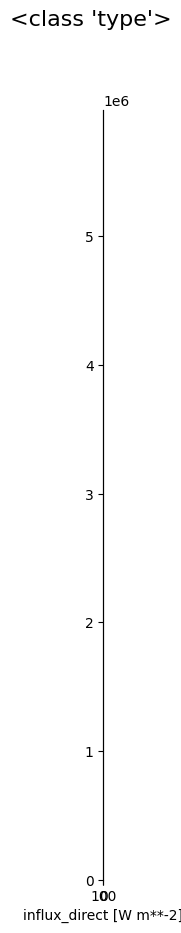

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(str(type), fontsize=16)
thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0,alpha = 0.1)
test['influx_direct'].where(test.time == '2019-12-31T12:00:00.000000000').fillna(0).plot(ax = ax, zorder = 1)